# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "D:/AV/DataSetExploration/drone-dataset-tools/data"

In [2]:
exec(open('init_notebook.py').read())

current working dirF:\diverging-trajectories\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

In [5]:
sceneId = 240
date = "2023-05-04"
fps=10
location = "location-2"
# file = os.path.join(dataDir, "location-2/2023-05-04-fps-10-scene-240-pedestrians.csv")
# pedDf = pd.read_csv(file)

pedDf = pd.read_csv(os.path.join(dataDir, f"{location}/{date}-fps-{fps}-scene-{sceneId}-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, f"{location}/{date}-fps-{fps}-scene-{sceneId}-others.csv"))
tracksMeta = pd.read_csv(os.path.join(dataDir, f"{location}/{date}-fps-{fps}-scene-{sceneId}-meta.csv"))
pedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
0,18,3208,18061,240,6.0,-0.026381,2.882353,0.171520,0.800383,-0.045989,0.044870
1,18,3210,18061,240,6.0,-0.063628,2.724335,0.186239,0.790090,-0.073597,0.051462
2,18,3212,18061,240,6.0,-0.103918,2.568007,0.201445,0.781639,-0.076030,0.042259
3,18,3214,18061,240,6.0,-0.147248,2.413341,0.216651,0.773328,-0.076027,0.041552
4,18,3216,18061,240,6.0,-0.193228,2.259880,0.229901,0.767307,-0.066252,0.030105


In [6]:
pedDf.describe()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
count,9659.000000,9659.000000,9659.000000,9659.0,9659.0,9659.000000,9659.000000,9659.000000,9659.000000,9659.000000,9659.000000
mean,24.200124,15369.310074,24472.764779,240.0,6.0,1.226755,0.018108,0.039617,0.095749,-0.000211,0.003142
std,3.466793,9301.544570,3497.499886,0.0,0.0,1.615345,1.769070,0.187925,0.555813,0.047845,0.051046
min,18.000000,208.000000,18061.000000,240.0,6.0,-4.866070,-3.145221,-0.660242,-1.050284,-0.230381,-0.367664
25%,21.000000,7280.000000,21326.000000,240.0,6.0,0.284170,-1.512749,-0.066877,-0.521876,-0.028192,-0.023010
50%,24.000000,14904.000000,24244.000000,240.0,6.0,1.380099,0.041509,0.054557,0.455882,-0.000934,0.002896
75%,27.000000,23090.000000,27532.000000,240.0,6.0,2.472700,1.555379,0.161763,0.577074,0.027012,0.029760
max,29.000000,32312.000000,29577.000000,240.0,6.0,4.902650,3.180556,0.622109,1.206539,0.359610,0.313758


In [7]:
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed',
        fps=fps
    )
transformer = TrajectoryTransformer(colMapper)
visualizer = TrajectoryVisualizer()

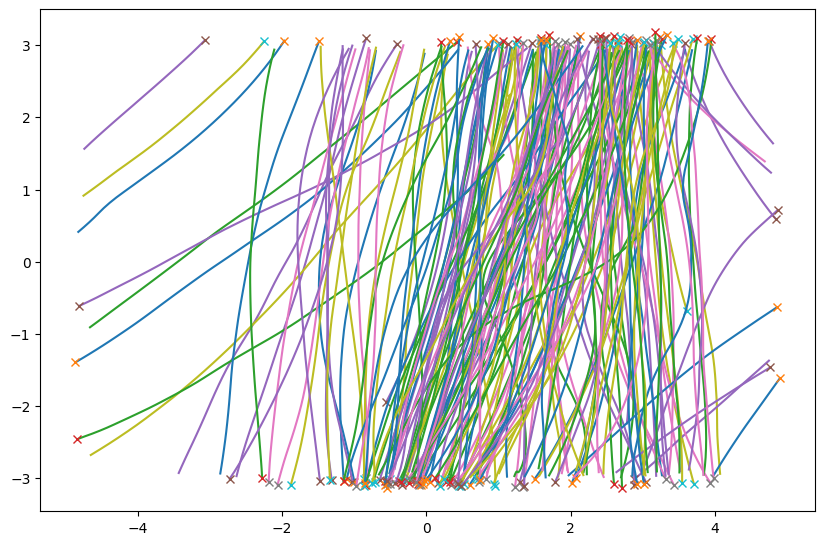

In [8]:
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

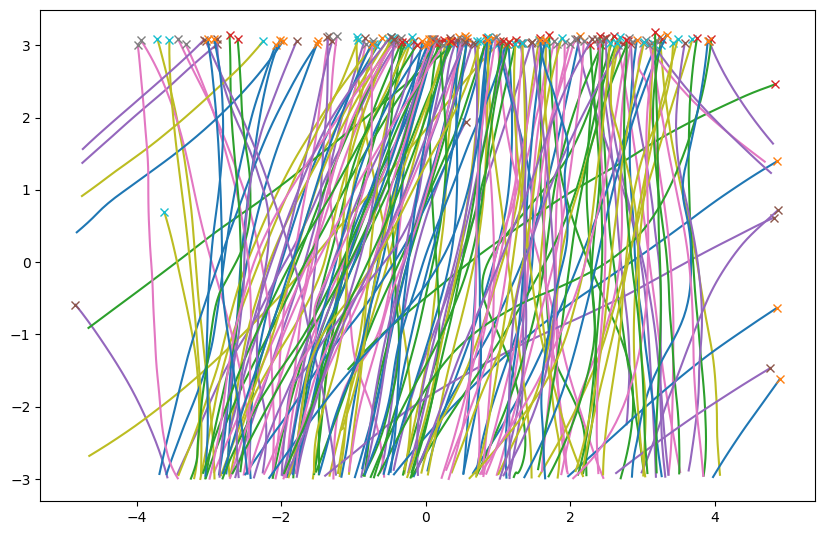

In [9]:
southIds, northenedDf = transformer.convertTracksToNorth(
            pedDf, 
            xCol="sceneX", 
            yCol="sceneY", 
            tracksMeta=None
        )
visualizer.show(northenedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

In [10]:
singleTrack = northenedDf[northenedDf["uniqueTrackId"]==18061]

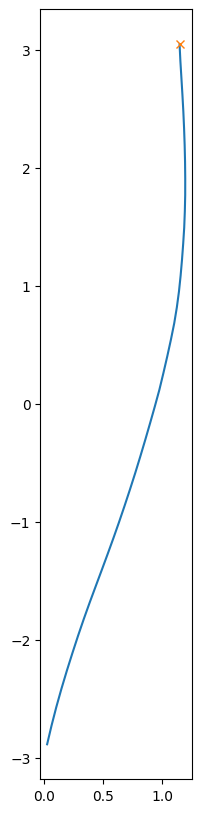

In [11]:
visualizer.show(singleTrack, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

In [12]:
from yupi.graphics import plot_2d
from diverging_trajectories.pattern import DisplacementIntervalSequenceExtractor
from diverging_trajectories.pattern import PatternVisualizer
from diverging_trajectories.YupiUtils import YupiUtils


## Breaking up trajectories

In [13]:
extractor = DisplacementIntervalSequenceExtractor(
    interval = 1.0,
    tolerance = 0.1,
    yLow = pedDf["sceneY"].min(),
    yHigh = pedDf["sceneY"].max(),
    xCol="sceneX",
    yCol="sceneY"
)

patternVisualizer = PatternVisualizer()

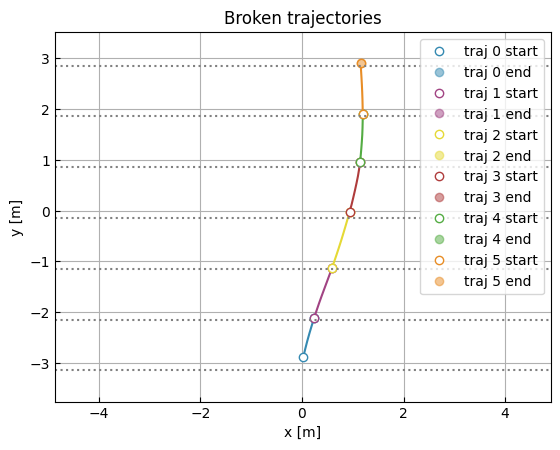

0.26286826586999057 0
1.0352377354901647 1
2.0083594216532594 2
3.123428922816078 3
4.096312882532616 4
5.05407120055914 5


In [14]:
patterns = extractor.extract("18128", singleTrack)
patterns
patternVisualizer.plotPatterns(
    patterns,
    hLines=extractor.segmentOffsets,
    xmin=pedDf["sceneX"].min(), 
    xmax=pedDf["sceneX"].max(),
    title="Broken trajectories"
)
# ax = plot_2d(patterns, show=False)
# ax.set_title("Broken trajectories")
# ax.hlines(extractor.segmentOffsets, xmin=pedDf["sceneX"].min(), xmax=pedDf["sceneX"].max())
# plt.show()
for pattern in patterns:
    print(pattern.yOffset, pattern.roundYOffset)

In [15]:
singleTrack.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
0,18,3208,18061,240,6.0,0.026381,-2.882353,0.171520,0.800383,-0.045989,0.044870
1,18,3210,18061,240,6.0,0.063628,-2.724335,0.186239,0.790090,-0.073597,0.051462
2,18,3212,18061,240,6.0,0.103918,-2.568007,0.201445,0.781639,-0.076030,0.042259
3,18,3214,18061,240,6.0,0.147248,-2.413341,0.216651,0.773328,-0.076027,0.041552
4,18,3216,18061,240,6.0,0.193228,-2.259880,0.229901,0.767307,-0.066252,0.030105


## Extending trajectories less than interval

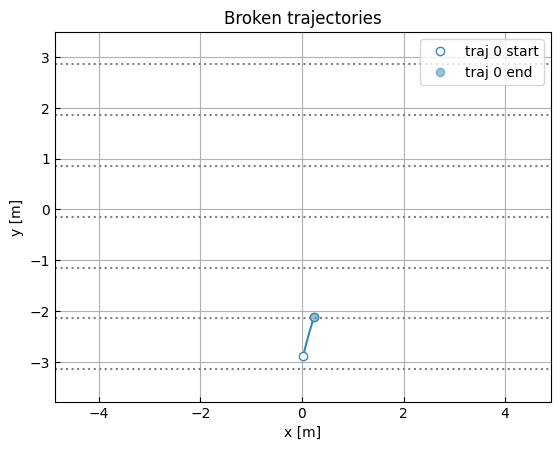

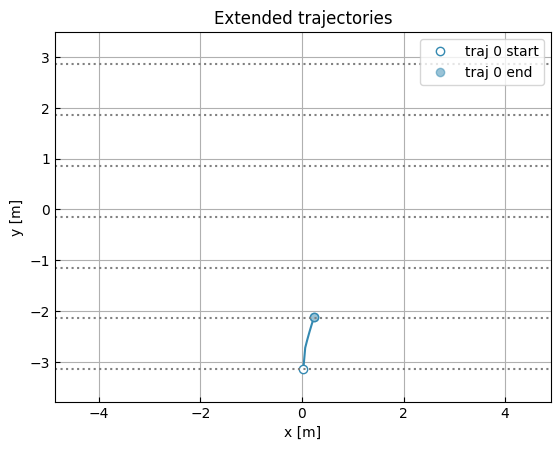

In [16]:
pattern = patterns[0]
newPattern = extractor.adjustToStartInterval(pattern, pattern.t_0)
# print(pattern.r, pattern.t, pattern.yOffset)
# print(newPattern.r, newPattern.t, newPattern.yOffset)
patternVisualizer.plotPatterns(
    [pattern],
    hLines=extractor.segmentOffsets,
    xmin=pedDf["sceneX"].min(), 
    xmax=pedDf["sceneX"].max(),
    title="Broken trajectories"
)
patternVisualizer.plotPatterns(
    [newPattern],
    hLines=extractor.segmentOffsets,
    xmin=pedDf["sceneX"].min(), 
    xmax=pedDf["sceneX"].max(),
    title="Extended trajectories"
)

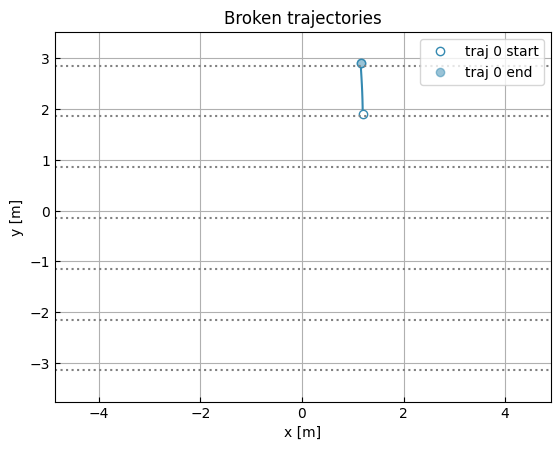

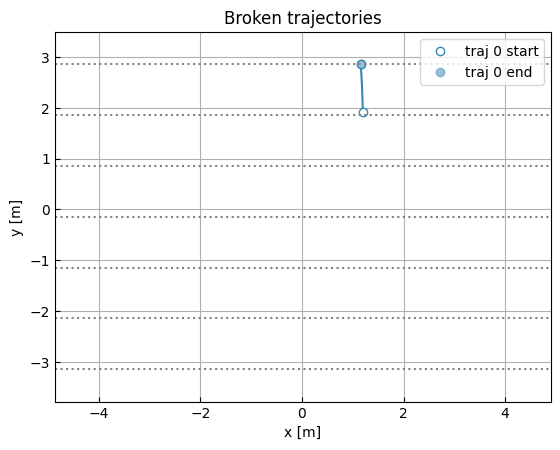

In [17]:
pattern = patterns[-1]
newPattern = extractor.adjustToEndInterval(pattern, pattern.t_0)
# print(pattern.r, pattern.t, pattern.yOffset)
# print(newPattern.r, newPattern.t, newPattern.yOffset)

patternVisualizer.plotPatterns(
    [pattern],
    hLines=extractor.segmentOffsets,
    xmin=pedDf["sceneX"].min(), 
    xmax=pedDf["sceneX"].max(),
    title="Broken trajectories"
)
patternVisualizer.plotPatterns(
    [newPattern],
    hLines=extractor.segmentOffsets,
    xmin=pedDf["sceneX"].min(), 
    xmax=pedDf["sceneX"].max(),
    title="Broken trajectories"
)

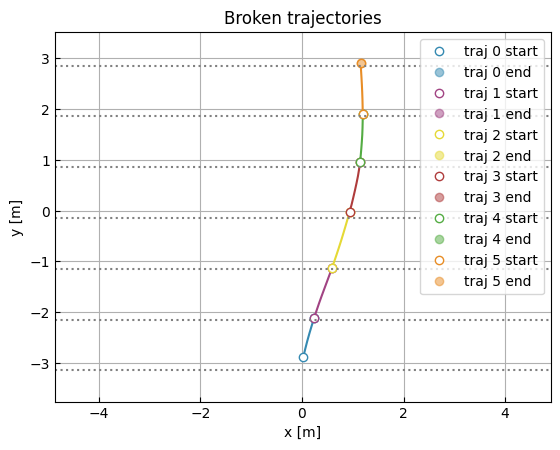

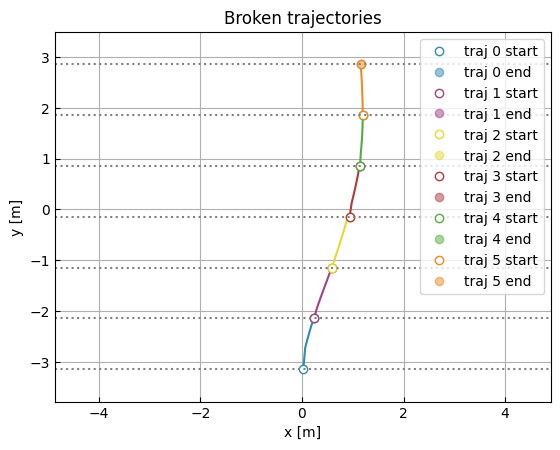

In [18]:
newPatterns = extractor.adjustAllToInterval(patterns)
patternVisualizer.plotPatterns(
    patterns,
    hLines=extractor.segmentOffsets,
    xmin=pedDf["sceneX"].min(), 
    xmax=pedDf["sceneX"].max(),
    title="Broken trajectories"
)
patternVisualizer.plotPatterns(
    newPatterns,
    hLines=extractor.segmentOffsets,
    xmin=pedDf["sceneX"].min(), 
    xmax=pedDf["sceneX"].max(),
    title="Broken trajectories"
)

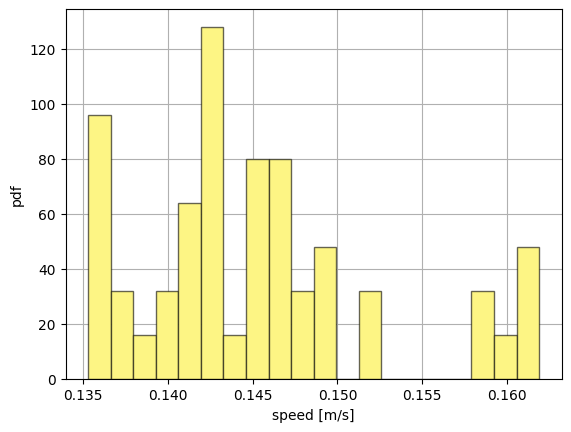

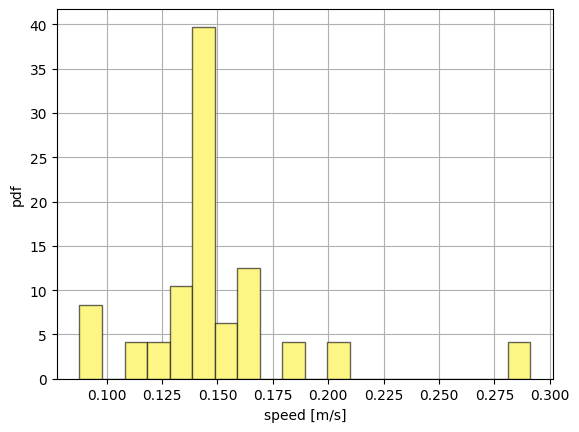

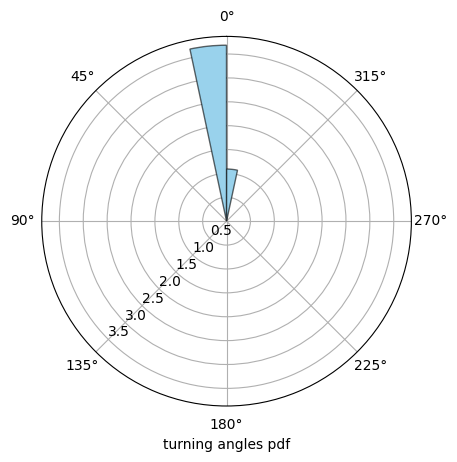

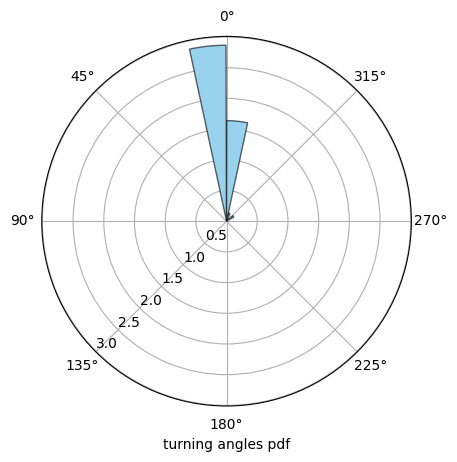

In [19]:
patternVisualizer.speedHist(patterns)
patternVisualizer.speedHist(newPatterns)
patternVisualizer.turnHist(patterns)
patternVisualizer.turnHist(newPatterns)

## Database

In [20]:
# from diverging_trajectories.pattern import IntervalPatternSequence
# from diverging_trajectories.pattern import PatternModel
# from diverging_trajectories.pattern import IntervalPatternRepository
# from peewee import *
# db = SqliteDatabase('pattern.db', field_types={'points': 'text'})
# print(db)
# db.create_tables([IntervalPatternSequence, PatternModel])
# db.close()

In [21]:
# repo = IntervalPatternRepository(intervalType="distance")
# repo.addSequence(
#     sourceId="18120", interval=1,
#     patterns=patterns)

In [22]:
# readPatterns = repo.getPatterns()
# for p in readPatterns:
#     print("seqno", p.patternSeqNo)

In [23]:
# patternVisualizer.plotPatterns(
#     readPatterns,
#     hLines=extractor.segmentOffsets,
#     xmin=pedDf["sceneX"].min(), 
#     xmax=pedDf["sceneX"].max(),
#     title="Broken trajectories"
# )

In [24]:
# readPatterns = repo.getPatternsByRoundOffset(2)
# patternVisualizer.plotPatterns(
#     readPatterns,
#     hLines=extractor.segmentOffsets,
#     xmin=pedDf["sceneX"].min(), 
#     xmax=pedDf["sceneX"].max(),
#     title="Broken trajectories"
# )

### Build database on northened trajectories

In [25]:
from diverging_trajectories.pattern import IntervalPatternSequence, PatternModel
from peewee import *
db = SqliteDatabase('pattern.db', field_types={'points': 'text'})
# print(db)
db.create_tables([IntervalPatternSequence, PatternModel])
db.close()

False

In [26]:
from diverging_trajectories.pattern import IntervalPatternRepository
from diverging_trajectories.pattern import DisplacementIntervalSequenceExtractor
from tqdm import tqdm

In [27]:

interval = 1.0
extractor = DisplacementIntervalSequenceExtractor(
    interval = interval,
    tolerance = 0.1,
    yLow = pedDf["sceneY"].min(),
    yHigh = pedDf["sceneY"].max(),
    xCol="sceneX",
    yCol="sceneY"
)

repo = IntervalPatternRepository(intervalType="distance")

In [28]:
pedIds = northenedDf["uniqueTrackId"].unique()
for pedId in tqdm(pedIds):
    sourceId = str(pedId)
    aTrack = northenedDf[northenedDf["uniqueTrackId"] == pedId]
    patterns = extractor.extract(sourceId, aTrack)
    repo.addSequence(
        sourceId=sourceId, interval=interval,
        patterns=patterns
    )
    

  0%|                                                                                          | 0/184 [00:00<?, ?it/s]


IntegrityError: UNIQUE constraint failed: interval_pattern_sequence.sourceId

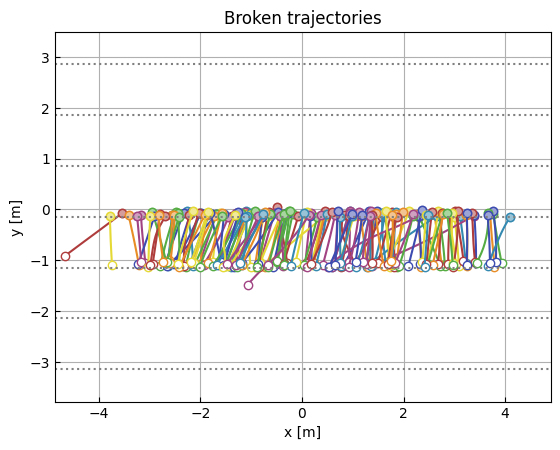

In [29]:
readPatterns = repo.getPatternsByRoundOffset(2)
patternVisualizer.plotPatterns(
    readPatterns,
    hLines=extractor.segmentOffsets,
    xmin=pedDf["sceneX"].min(), 
    xmax=pedDf["sceneX"].max(),
    title="Broken trajectories",
    legend=False
)

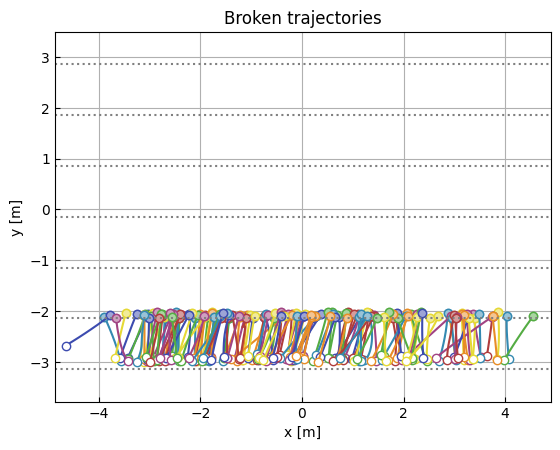

In [30]:
readPatterns = repo.getPatternsByHeadingStart(startPositive=True, roundOffset=0)
patternVisualizer.plotPatterns(
    readPatterns,
    hLines=extractor.segmentOffsets,
    xmin=pedDf["sceneX"].min(), 
    xmax=pedDf["sceneX"].max(),
    title="Broken trajectories",
    legend=False
)

In [33]:
from diverging_trajectories.generator import TrajectoryGenerator
generator = TrajectoryGenerator()

In [37]:
combined = generator.combinePatterns(patterns)

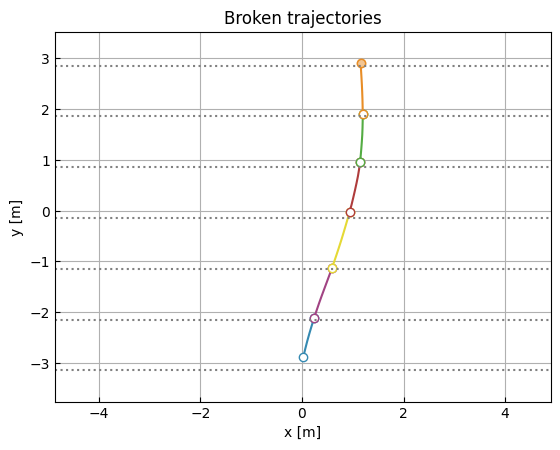

In [38]:
patternVisualizer.plotPatterns(
    patterns,
    hLines=extractor.segmentOffsets,
    xmin=pedDf["sceneX"].min(), 
    xmax=pedDf["sceneX"].max(),
    title="Broken trajectories",
    legend=False
)

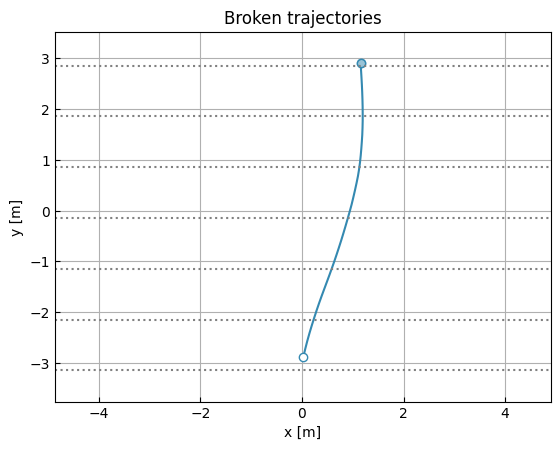

In [39]:
patternVisualizer.plotPatterns(
    [combined],
    hLines=extractor.segmentOffsets,
    xmin=pedDf["sceneX"].min(), 
    xmax=pedDf["sceneX"].max(),
    title="Broken trajectories",
    legend=False
)

In [41]:
from diverging_trajectories.generator import BumpyGenerator
generator = BumpyGenerator(repo, interval=1.0, maxHeadingDiff=30)

In [42]:
trajPatterns = generator.generateByRoundedOffset(5)

TypeError: getPatternsByHeadingStart() got an unexpected keyword argument 'roundYOffset'